In [11]:
import pandas as pd
import uproot
#import uproot3
import numpy as np
# import track_time_calibration as ttc
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\tracking')
from tqdm import tqdm
from hit import Hit
from track3D import Track3D
import track_reconstruction as tr
# def merger(Array_of_paths):
#     br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']   
#     df_general = pd.DataFrame(columns = br_list_data)
#     for element in Array_of_paths:
#         Tname = 'board_57'
#         # Extract the data and transform it into a dataframe
#         with uproot.open(element) as tree:
#             dict_ecal = tree[Tname].arrays(br_list_data, library="np")
#         ## REALLY IMPORTANT, THE TIME CALIBRATION MUST BE DONE USIGN THE SAME DATAFRAME AS THE ONE USED TO RECONSTRUCT THE TRACK

#         df = pd.DataFrame.from_dict(dict_ecal).query('n_hits>6')
#         df['path_id'] = element
#         df=df.query('n_hits<18')
#         #print(df)
#         df_general=df_general.append(df)
#     print(df_general)
#     return df_general
## THUS FAR WE HAVE OPENED AND CREATED A GENERIC DATAFRAME ##





In [12]:
file_path = r'C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\test_import_root\data_0000\data_0000.root' ## later, one can use concatenation of data_0001.root - data_0008.root files as well. One is enough for testing

hits_tree = 'event_data;1'
evt_tree = 'event_data;1'
# br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']
br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp', 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value']
br_list_evt = ['timestamp', 'evt_number', 'evt_flags']
with uproot.open(file_path) as tree:
    hits_dict = tree[hits_tree].arrays(br_list_data, library="np")
    evts_dict = tree[evt_tree].arrays(br_list_evt, library="np")
    
# df_hits = pd.DataFrame.from_dict(hits_dict).query('n_hits > 3')
df_hits = pd.DataFrame.from_dict(hits_dict)
df_evts = pd.DataFrame.from_dict(evts_dict)




In [13]:
df_hits['timestamp_global'] = df_evts['timestamp']
df_hits.query('n_hits > 2', inplace=True)

In [14]:
df_hits

,n_hits,tofpet_id,tofpet_channel,timestamp,t_coarse,t_fine,v_coarse,v_fine,value,timestamp_global
0,10,"[0, 1, 4, 2, 2, 1, 0, 0, 3, 2]","[19, 59, 63, 1, 57, 47, 3, 56, 37, 29]","[0.71714854, 0.8543002, 0.67592627, 1.6058003,...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]","[238, 218, 238, 274, 279, 346, 349, 312, 273, ...","[38, 40, 52, 38, 38, 35, 35, 33, 34, 36]","[47, 54, 54, 56, 49, 47, 48, 41, 49, 50]","[2.5804403, -1.6836902, 0.85353595, -0.6369181...","[0.71714854, 0.8543002, 0.67592627, 1.6058003,..."
1,11,"[6, 7, 1, 5, 6, 4, 4, 4, 3, 4, 6]","[57, 41, 33, 45, 29, 1, 45, 21, 49, 41, 5]","[0.9661601, 0.83019966, 0.5846706, 0.70174503,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2]","[201, 228, 269, 259, 207, 290, 288, 281, 198, ...","[38, 44, 36, 42, 36, 43, 47, 48, 38, 42, 38]","[44, 46, 49, 51, 49, 55, 47, 59, 41, 44, 51]","[-0.4197436, 1.1023713, -3.9913654, -2.4423745...","[0.9661601, 0.83019966, 0.5846706, 0.70174503,..."
4,3,"[0, 0, 2]","[50, 14, 59]","[0.8946359, 0.9505451, 0.6234562]","[0, 0, 0]","[202, 215, 263]","[42, 38, 38]","[47, 44, 47]","[-3.1595786, -2.850576, -2.1561673]","[0.8946359, 0.9505451, 0.6234562]"
5,13,"[6, 4, 2, 1, 2, 1, 0, 6, 3, 0, 4, 2, 5]","[58, 18, 42, 34, 2, 62, 46, 38, 46, 22, 42, 22...","[0.91540015, 1.0089443, 0.9756159, 1.3799452, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[210, 196, 205, 302, 303, 320, 300, 305, 320, ...","[30, 42, 36, 37, 39, 39, 35, 38, 42, 40, 43, 4...","[57, 56, 56, 55, 55, 50, 47, 53, 44, 50, 47, 5...","[-0.66960245, 1.7276224, -1.938513, -2.0071847...","[0.91540015, 1.0089443, 0.9756159, 1.3799452, ..."
6,10,"[2, 0, 4, 3, 2, 1, 2, 3, 0, 1]","[31, 22, 42, 53, 11, 62, 47, 55, 50, 34]","[0.9576057, 0.84512675, 0.907295, 1.0553309, 1...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]","[202, 193, 188, 352, 365, 337, 295, 327, 190, ...","[40, 40, 44, 35, 37, 39, 40, 39, 42, 37]","[51, 52, 50, 47, 57, 52, 52, 44, 48, 54]","[0.5291524, 5.0304747, 0.43730345, -1.7320895,...","[0.9576057, 0.84512675, 0.907295, 1.0553309, 1..."
...,...,...,...,...,...,...,...,...,...,...
2614,14,"[4, 4, 1, 5, 1, 0, 0, 2, 3, 6, 3, 2, 7, 6]","[56, 32, 60, 52, 48, 32, 56, 41, 37, 45, 61, 2...","[0.51836836, 0.41800958, 0.439225, 0.88210744,...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2]","[274, 278, 278, 215, 217, 249, 181, 245, 343, ...","[38, 48, 36, 48, 40, 40, 34, 42, 33, 31, 31, 3...","[46, 52, 63, 47, 54, 50, 42, 57, 43, 51, 46, 5...","[-3.412683, -1.8935939, -0.8577625, -1.9146228...","[0.51836836, 0.41800958, 0.439225, 0.88210744,..."
2616,17,"[4, 0, 1, 3, 4, 6, 7, 0, 2, 3, 4, 5, 6, 0, 2, ...","[54, 54, 46, 63, 6, 35, 55, 6, 60, 43, 30, 46,...","[0.9848264, 1.419367, 1.320446, 1.3746648, 1.4...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[192, 263, 298, 306, 284, 272, 302, 260, 327, ...","[46, 36, 40, 38, 48, 44, 37, 34, 39, 37, 42, 3...","[50, 58, 53, 52, 45, 49, 49, 49, 44, 55, 54, 5...","[-0.7786965, -1.2151963, -0.1161658, -3.038717...","[0.9848264, 1.419367, 1.320446, 1.3746648, 1.4..."
2618,17,"[1, 3, 6, 2, 0, 4, 4, 4, 2, 0, 2, 6, 0, 7, 4, ...","[45, 49, 29, 37, 33, 1, 28, 25, 63, 5, 13, 57,...","[0.3396998, 0.8316652, 0.7212652, 0.7903, 0.18...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[303, 218, 226, 251, 344, 290, 338, 335, 222, ...","[39, 38, 36, 40, 39, 44, 47, 51, 34, 34, 38, 3...","[48, 39, 48, 53, 43, 59, 55, 54, 53, 49, 54, 4...","[-1.8705255, -2.5865526, -0.58924216, -2.89706...","[0.3396998, 0.8316652, 0.7212652, 0.7903, 0.18..."
2619,15,"[1, 6, 5, 4, 1, 7, 4, 6, 7, 4, 6, 7, 3, 1, 3]","[56, 32, 50, 48, 44, 59, 12, 44, 47, 20, 28, 6...","[0.9076179, 0.919715, 0.6917798, 0.85106605, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]","[200, 189, 243, 204, 229, 199, 249, 199, 214, ...","[40, 36, 36, 52, 42, 38, 48, 36, 42, 48, 40, 4...","[56, 46, 51, 60, 55, 47, 49, 51, 48, 46, 44, 4...","[-1.5652713, 0.09328436, 0.07948044, -0.735195...","[0.9076179, 0.919715, 0.6917798, 0.85106605, 0..."


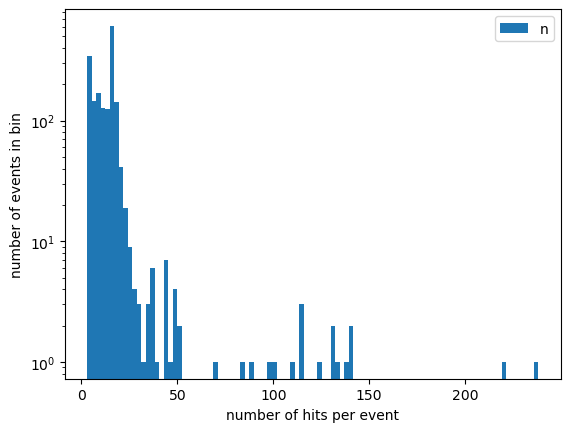

In [15]:
# basic histogram
hits_table=df_hits['n_hits'].to_numpy()
hits_table_cut=hits_table[hits_table>2]
plt.hist(hits_table_cut,bins = 100,log = True)
plt.xlabel('number of hits per event')
plt.ylabel('number of events in bin')
plt.legend('n')

In [16]:

def create_tracks(df, plot = False):
    tracks = []
    nb_events = len(df['n_hits'])
    steps = 9
    buff_start = None
    buff_evt_idx = None
    dts = []
    for index, row in tqdm(df.iterrows(), total = df.shape[0]):
        channels = row['tofpet_channel']
        tofpet_id = row['tofpet_id']
        hits = [Hit(row,i) for i in range(row['n_hits'])]
        hitsX = [h for h in hits if h.is_sidex]
        hitsY = [h for h in hits if not h.is_sidex]
        
        ## Some events don't have three hits on one of the two sides and are thus not considered
        if len(hitsX) > 3 and len(hitsY) > 3:
            # get track parameters
            track = Track3D(hits)
            tracks.append(track)

            ## check if track has a "good" chi2 value
            if track.is_good_2D_fit():
            
                # worth making a precise track
                #track.precise_track()
                
                ## compute the time of the track
                dt = track.get_time_interval()
                if dt is not None:
                    dts.append(dt)


    return tracks, dts
    


In [18]:
tracks, dts = create_tracks(df_hits[0:2000])

  0%|          | 0/1779 [00:00<?, ?it/s]


KeyError: 'timestamp_event'

In [ ]:
# testing individual outputs
good_tracks = [t for t in tracks if t.is_good_2D_fit()]
i = np.random.randint(0, len(tracks))
print('####### Track # {}'.format(i))
t = good_tracks[i]
t.print(True)
# t.precise_track()
# print('after')
# t.print(True)

In [ ]:
t1 = good_tracks[6]
tt_x = t1.x
tt_y = t1.y
fig, axs=plot_hits(tt_x.hits,True)
z = np.linspace(0,16,50)
x = tt_x.x(z)
axs.plot(x,z,'r-')
fig, axs=plot_hits(tt_y.hits,False)
z = np.linspace(0,16,50)
x = tt_y.x(z)
axs.plot(x,z,'r-')